# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_mice}")

Number of unique mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_id = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_data = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_mice_clean_data}")

Number of unique mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Generate the summary statistics table with properly formatted columns
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Std_Dev="std",
    Tumor_Volume_Std_Err="sem",
)

# Rename the columns to match the exact desired format
summary_stats.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
]

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# A more advanced method to generate a summary statistics table in a single line
advanced_summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
).rename(
    columns={
        "mean": "Mean",
        "median": "Median",
        "var": "Variance",
        "std": "Std. Dev.",
        "sem": "Std. Err."
    }
)

# Add a MultiIndex for the header to include "Tumor Volume (mm3)" as the main title
advanced_summary_stats.columns = pd.MultiIndex.from_product(
    [["Tumor Volume (mm3)"], advanced_summary_stats.columns]
)

# Display the formatted table
advanced_summary_stats





Tumor Volume (mm3)                                          
                           Mean     Median   Variance Std. Dev. Std. Err.
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

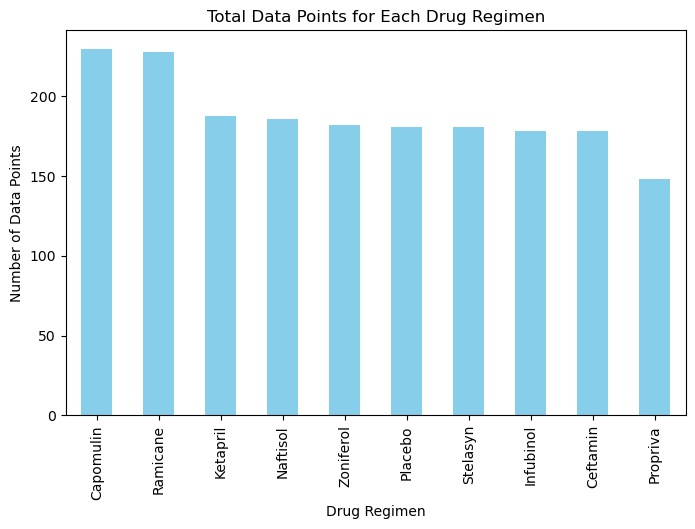

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
# Group by "Drug Regimen" and count the number of rows
drug_counts = clean_data["Drug Regimen"].value_counts()

# Create the bar plot using Pandas
drug_counts.plot(kind="bar", color="skyblue", figsize=(8, 5), title="Total Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()


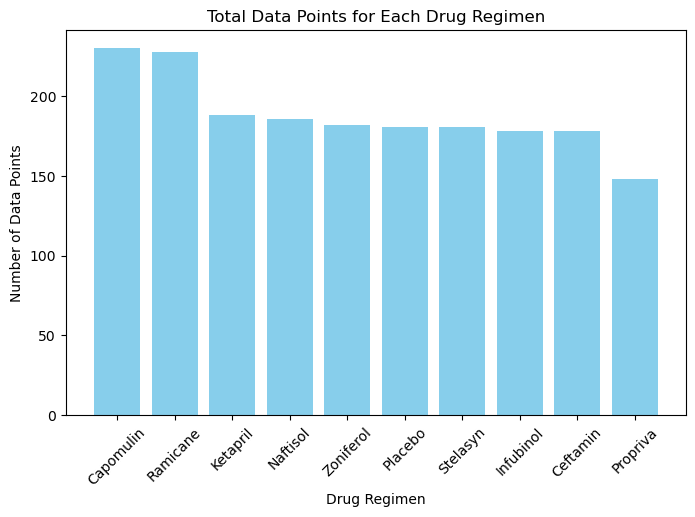

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pyplot
# Group by "Drug Regimen" and count the number of rows
drug_counts = clean_data["Drug Regimen"].value_counts()

# Create the bar plot using Matplotlib's Pyplot
plt.figure(figsize=(8, 5))
plt.bar(drug_counts.index, drug_counts.values, color="skyblue")
plt.title("Total Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


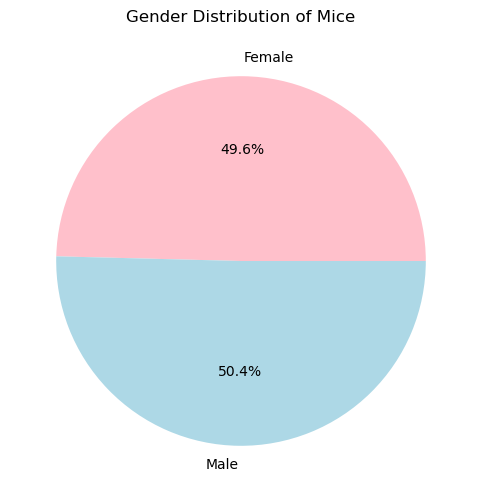

In [11]:
# Generate a pie chart showing the distribution of unique female versus male mice using Pyplot
# Group by "Sex" and count unique Mouse IDs
gender_counts = clean_data.groupby("Sex")["Mouse ID"].nunique()

# Create the pie chart using Matplotlib's Pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["pink", "lightblue"])
plt.title("Gender Distribution of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint.head()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"])
merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Calculate the IQR and determine potential outliers
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

    # Append tumor volumes for this drug to the list
    tumor_vol_data.append(drug_data)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/md/21_3lt411d11zb59smffk2yc0000gq/T/ipykernel_77172/2353451398.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


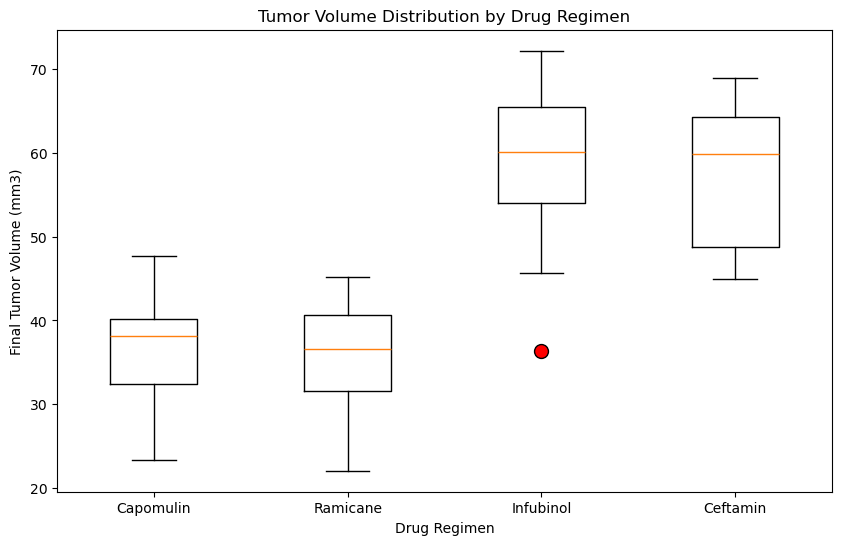

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))

# Use the correct data and labels
ax.boxplot(
    tumor_vol_data,
    labels=treatments,  # Replace `labels` with `tick_labels` to match Matplotlib 3.9+
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10}
)

# Add title and labels
ax.set_title("Tumor Volume Distribution by Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")

plt.show()



## Line and Scatter Plots

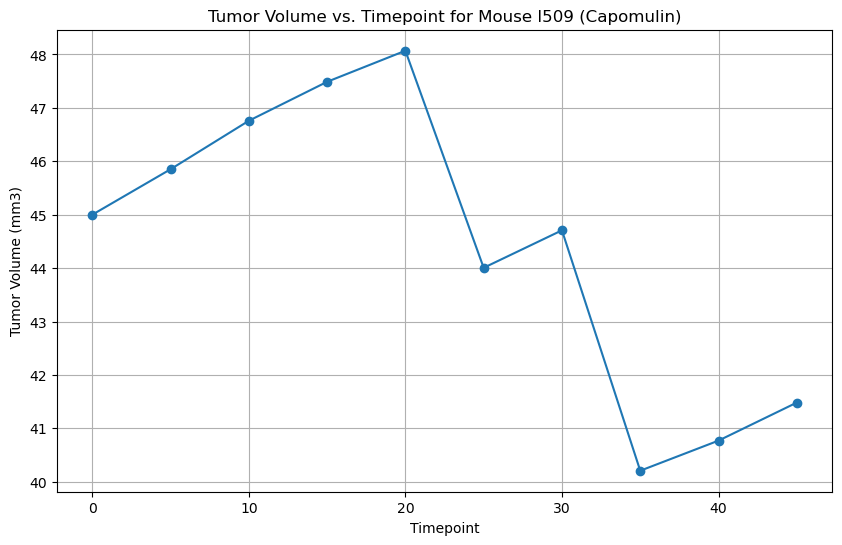

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_data[capomulin_data["Mouse ID"] == "l509"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_id["Timepoint"], mouse_id["Tumor Volume (mm3)"], marker="o")

# Add title and labels
plt.title("Tumor Volume vs. Timepoint for Mouse l509 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Display the plot
plt.show()


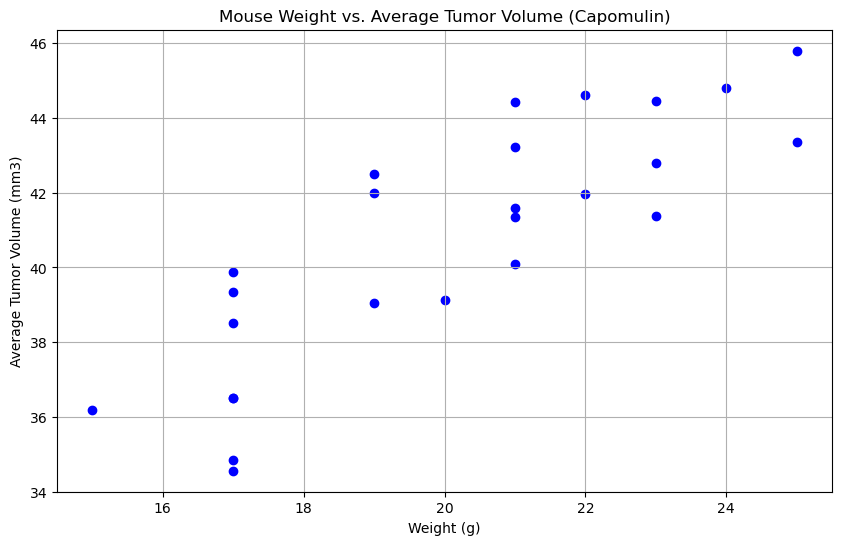

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate the mean for relevant columns
capomulin_grouped = capomulin_data.groupby("Mouse ID").mean(numeric_only=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"], color="blue")

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

# Display the plot
plt.show()


## Correlation and Regression

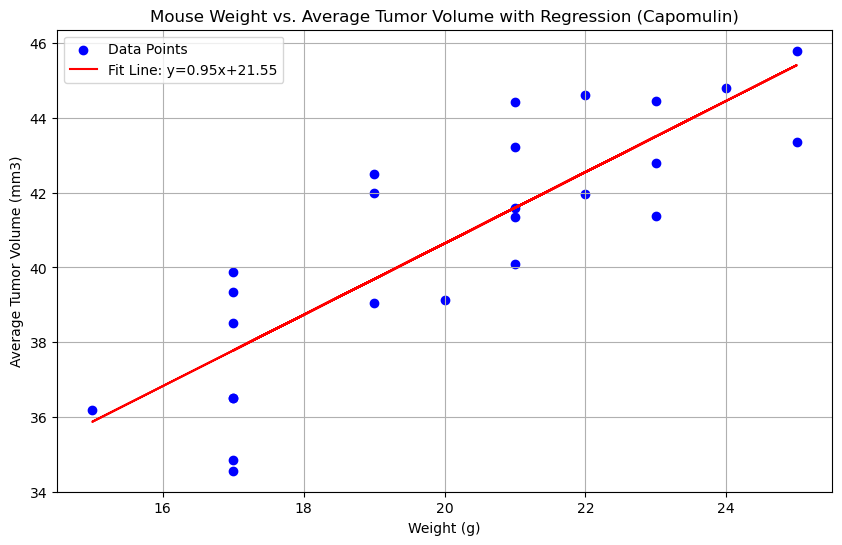

Correlation Coefficient: 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model
from scipy.stats import linregress

# Extract data for regression
x = capomulin_grouped["Weight (g)"]
y = capomulin_grouped["Tumor Volume (mm3)"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Generate regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"Fit Line: y={slope:.2f}x+{intercept:.2f}")

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume with Regression (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid()

# Display the plot
plt.show()

# Display the correlation coefficient
print(f"Correlation Coefficient: {rvalue:.2f}")
